In [ ]:
# basic imports
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/xeno_data_set.csv"
data_frame = pd.read_csv(path, parse_dates=['created_on'])
data_frame.head()

,id,customer_id,location_id,channel,amount,bill_no,created_on
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-24 00:00:00
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-14 19:21:00
2,44397299,166,347,uber,355,DEL005-29173,2018-09-13 13:40:00
3,44405460,166,347,uber,371,DEL005-29180,2018-09-13 14:33:00
4,44717004,166,347,uber,371,DEL005-29603,2018-09-16 12:40:00


In [ ]:
print("Dataframe Information & Descriptive Statistics \n")
data_frame.info()
data_frame.describe()

Dataframe Information & Descriptive Statistics 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533327 entries, 0 to 533326
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           533327 non-null  int64         
 1   customer_id  533327 non-null  int64         
 2   location_id  533327 non-null  int64         
 3   channel      533327 non-null  object        
 4   amount       533327 non-null  int64         
 5   bill_no      533327 non-null  object        
 6   created_on   533327 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 28.5+ MB


,id,customer_id,location_id,amount
count,5.333270e+05,5.333270e+05,533327.000000,533327.000000
mean,4.794955e+07,4.832702e+06,1500.813602,551.399865
std,7.987404e+06,3.424067e+06,1914.140397,1388.179206
min,3.561932e+07,6.000000e+01,192.000000,0.000000
25%,4.170082e+07,1.681087e+06,194.000000,304.000000
50%,4.692534e+07,5.880546e+06,272.000000,372.000000
75%,5.031443e+07,7.501177e+06,4003.000000,584.000000
max,6.392059e+07,1.165519e+07,5099.000000,604827.000000


In [ ]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [ ]:
data_frame['created_on'] = data_frame['created_on'].apply(get_month)

In [ ]:
grouping = data_frame.groupby('customer_id')['created_on']

In [ ]:
data_frame['CohortMonth'] = grouping.transform('min')

In [ ]:
data_frame.head()

,id,customer_id,location_id,channel,amount,bill_no,created_on,CohortMonth
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-01,2018-06-01
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-01,2018-01-01
2,44397299,166,347,uber,355,DEL005-29173,2018-09-01,2018-09-01
3,44405460,166,347,uber,371,DEL005-29180,2018-09-01,2018-09-01
4,44717004,166,347,uber,371,DEL005-29603,2018-09-01,2018-09-01


In [ ]:
def get_date_int(df, column): 
  year = df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  return year, month, day

In [ ]:
invoice_year, invoice_month, _ = get_date_int(data_frame, 'created_on')
cohort_year, cohort_month, _ = get_date_int(data_frame, 'CohortMonth')

In [ ]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [ ]:
data_frame['CohortIndex'] = years_diff*12 + months_diff + 1
data_frame.head()

,id,customer_id,location_id,channel,amount,bill_no,created_on,CohortMonth,CohortIndex
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-01,2018-06-01,1
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-01,2018-01-01,1
2,44397299,166,347,uber,355,DEL005-29173,2018-09-01,2018-09-01,1
3,44405460,166,347,uber,371,DEL005-29180,2018-09-01,2018-09-01,1
4,44717004,166,347,uber,371,DEL005-29603,2018-09-01,2018-09-01,1


In [ ]:
grouping = data_frame.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

In [ ]:
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='customer_id')
print(cohort_counts)

CohortIndex       1       2       3       4   ...     21     22     23     24
CohortMonth                                   ...                            
2018-01-01   22314.0  4079.0  3744.0  3731.0  ...  494.0  502.0  356.0  351.0
2018-02-01   17509.0  2014.0  2016.0  1901.0  ...  296.0  195.0  202.0    NaN
2018-03-01   13437.0  1481.0  1307.0  1329.0  ...  113.0  124.0    NaN    NaN
2018-04-01   13317.0  1139.0  1127.0  1111.0  ...   98.0    NaN    NaN    NaN
2018-05-01   13483.0  1084.0  1038.0   890.0  ...    NaN    NaN    NaN    NaN
2018-06-01   15627.0  1118.0   922.0  1001.0  ...    NaN    NaN    NaN    NaN
2018-07-01   15920.0   881.0   980.0   931.0  ...    NaN    NaN    NaN    NaN
2018-08-01   12597.0   756.0   679.0   750.0  ...    NaN    NaN    NaN    NaN
2018-09-01   16851.0  1087.0  1174.0   896.0  ...    NaN    NaN    NaN    NaN
2018-10-01   15108.0  1268.0   767.0   441.0  ...    NaN    NaN    NaN    NaN
2018-11-01   18267.0  1193.0   661.0   846.0  ...    NaN    NaN 

In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]
retention =cohort_counts.divide(cohort_sizes, axis = 0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,100.0,18.3,16.8,16.7,15.0,16.5,16.0,14.8,15.7,15.0,16.4,14.9,8.8,8.6,9.6,1.9,2.4,2.2,1.8,2.2,2.2,2.2,1.6,1.6
2018-02-01,100.0,11.5,11.5,10.9,11.0,11.2,10.0,11.4,11.1,12.4,10.4,6.1,6.4,7.8,1.2,1.7,1.6,1.4,1.7,1.5,1.7,1.1,1.2,NaN
2018-03-01,100.0,11.0,9.7,9.9,9.5,8.8,9.4,9.3,10.4,8.6,5.2,5.3,6.6,1.0,1.4,1.2,1.2,1.4,1.3,1.3,0.8,0.9,NaN,NaN
2018-04-01,100.0,8.6,8.5,8.3,7.2,7.9,7.7,8.5,7.7,4.4,4.6,5.9,0.9,1.2,1.0,1.0,1.1,1.0,1.0,0.8,0.7,NaN,NaN,NaN
2018-05-01,100.0,8.0,7.7,6.6,7.1,7.0,7.6,6.9,4.2,4.2,5.5,0.9,0.9,1.0,1.0,1.1,0.9,0.9,0.7,0.6,NaN,NaN,NaN,NaN
2018-06-01,100.0,7.2,5.9,6.4,6.4,7.1,6.1,3.5,3.9,4.7,0.7,0.9,0.8,0.8,0.8,0.9,0.9,0.7,0.7,NaN,NaN,NaN,NaN,NaN
2018-07-01,100.0,5.5,6.2,5.8,6.7,5.5,3.3,3.7,4.6,0.8,1.0,0.8,0.7,1.0,0.8,0.8,0.6,0.6,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,100.0,6.0,5.4,6.0,5.4,3.3,4.0,4.9,0.7,1.0,0.9,0.7,0.7,0.9,0.9,0.6,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,100.0,6.5,7.0,5.3,3.0,3.6,4.4,0.6,0.7,0.8,0.7,0.8,0.7,0.7,0.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


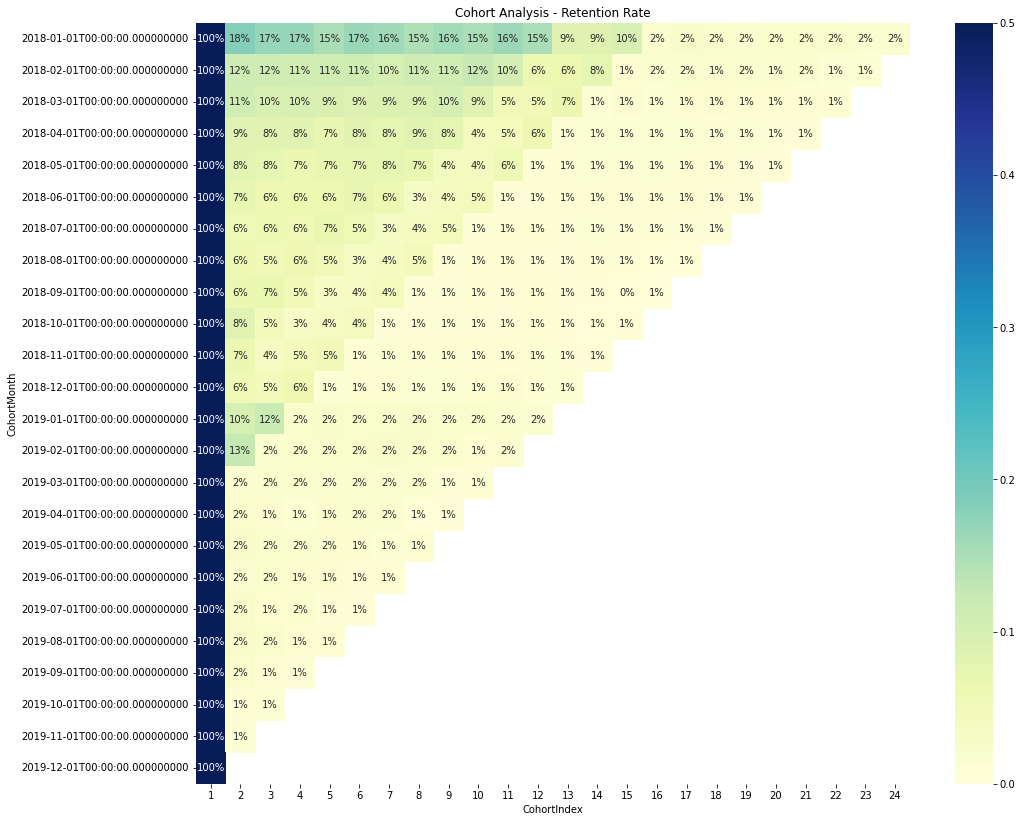

In [ ]:
plt.figure(figsize= (16,14))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()